# Laboratory practice № 2 (dynamic processes, free movement & stability)

Done by Vladislav Diuzhev (isu: 336225, group: R33353)

Variant: 16

## Preparation

In [1]:
import matplotlib.pyplot as plt
import control as ctrl
import sympy
import numpy as np

In [2]:
dt = 0.001

In [61]:
color = ["b", "g", "r"]

## Task 1 (free movement)

Mode pairs: 

3. neutral & stable aperiodic
4. neutral & unstable aperiodic
8. pair of unstable oscillating modes


In [3]:
a_1 = sympy.Symbol("a_1")
a_2 = sympy.Symbol("a_2")
lambdas = [
    [0, -1],
    [0, 0.3],
    [0.4 + 2*sympy.I, 0.4 - 2*sympy.I]
]

In [4]:
sols = []
for l in lambdas:
    sol = sympy.solve([l[0] + l[1] + a_1,l[0]*l[1] -a_2],a_1,a_2)
    sols.append([float(sol[a_1]), float(sol[a_2])])
    print("Solutions:",*sols[-1])

Solutions: 1.0 0.0
Solutions: -0.3 0.0
Solutions: -0.8 4.16


Lets solve these ODEs analytically

In [5]:
y = sympy.Function("y")
t = sympy.Symbol("t")

In [6]:
sympy.dsolve(y(t).diff(t,2)+sols[0][0]*y(t).diff(t) + sols[0][1]*y(t), 0)

Eq(y(t), C1 + C2*exp(-t))

In [7]:
sympy.dsolve(y(t).diff(t,2)+sols[1][0]*y(t).diff(t) + sols[1][1]*y(t), 0)

Eq(y(t), C1 + C2*exp(0.3*t))

In [8]:
sympy.dsolve(y(t).diff(t,2)+sols[2][0]*y(t).diff(t) + sols[2][1]*y(t), 0)

Eq(y(t), (C1*sin(2.0*t) + C2*cos(2.0*t))*exp(0.4*t))

Simulate

In [9]:
transferFunction_1_1 = ctrl.tf([1.], [1., *sols[0]])
transferFunction_1_2 = ctrl.tf([1.], [1., *sols[1]])
transferFunction_1_3 = ctrl.tf([1.], [1., *sols[2]])

Convert all the tfs to state space (to manage state initial conditions)

In [10]:
state_space_1_1, _ = ctrl.canonical_form(ctrl.tf2ss(transferFunction_1_1), form="reachable")
state_space_1_2, _ = ctrl.canonical_form(ctrl.tf2ss(transferFunction_1_2), form="reachable")
state_space_1_3, _ = ctrl.canonical_form(ctrl.tf2ss(transferFunction_1_3), form="reachable")

In [11]:
modeling_time_1 = 10 # sec
time_1 = np.linspace(0,modeling_time_1,int(modeling_time_1/dt))
u_1 = np.ones_like(time_1)*0 # free movement

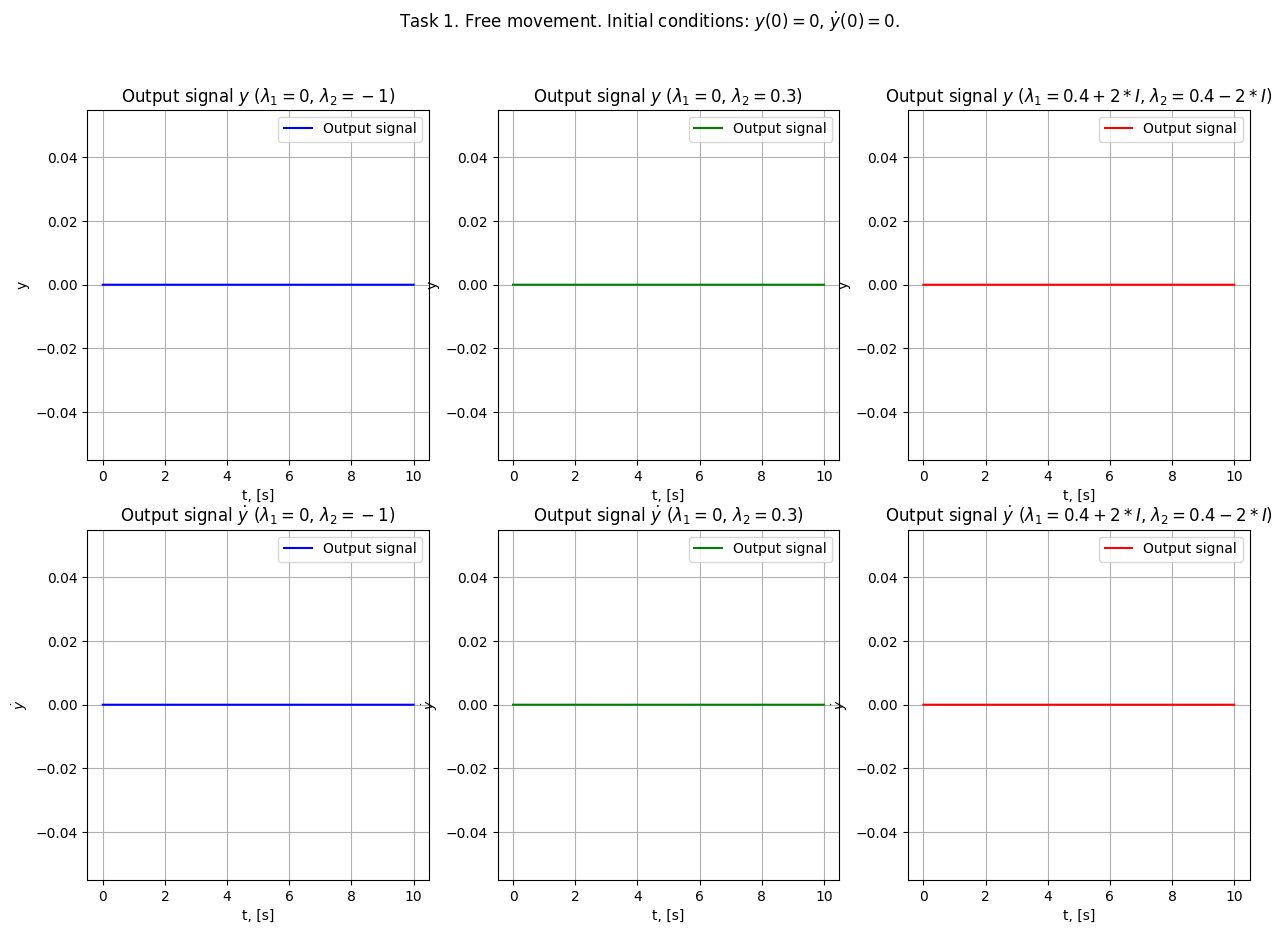

In [13]:
init_state_1 = [0,0]
y_1_1 = []
y_1_1.append(ctrl.forced_response(state_space_1_1, U=u_1, X0=init_state_1, T=time_1))
y_1_1.append(ctrl.forced_response(state_space_1_2, U=u_1, X0=init_state_1, T=time_1))
y_1_1.append(ctrl.forced_response(state_space_1_3, U=u_1, X0=init_state_1, T=time_1))


# Plotting
fig, ax = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle(f"Task 1. Free movement. Initial conditions: $y(0)={init_state_1[0]}$, $\dot y (0)={init_state_1[1]}.$")
for i in range(len(y_1_1)):
    ax[0,i].plot(time_1, y_1_1[i].states[0,:], color[i],label=f"Output signal")
    ax[0,i].set_ylabel("y")
    ax[0,i].set_xlabel("t, [s]")
    ax[0,i].grid(True)
    ax[0,i].set_title(f"Output signal $y$ ($\lambda_1={lambdas[i][0]}$, $\lambda_2={lambdas[i][1]}$)")
    ax[0,i].legend()

    ax[1,i].plot(time_1, y_1_1[i].states[1,:], color[i],label=f"Output signal")
    ax[1,i].set_ylabel("$\dot y$")
    ax[1,i].set_xlabel("t, [s]")
    ax[1,i].grid(True)
    ax[1,i].set_title(f"Output signal $\dot y$ ($\lambda_1={lambdas[i][0]}$, $\lambda_2={lambdas[i][1]}$)")
    ax[1,i].legend()

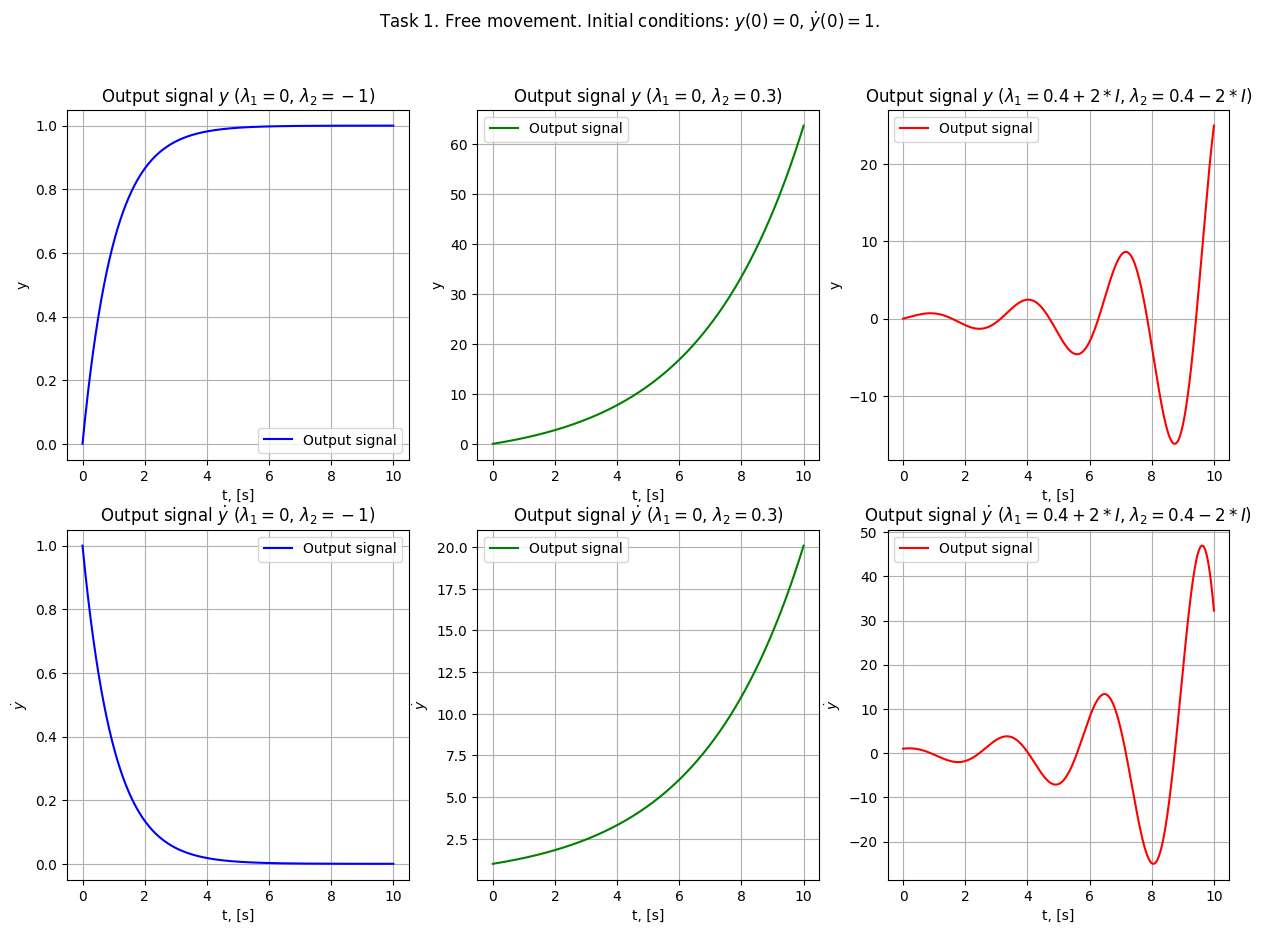

In [14]:
init_state_1 = [1,0]
y_1_1 = []
y_1_1.append(ctrl.forced_response(state_space_1_1, U=u_1, X0=init_state_1, T=time_1))
y_1_1.append(ctrl.forced_response(state_space_1_2, U=u_1, X0=init_state_1, T=time_1))
y_1_1.append(ctrl.forced_response(state_space_1_3, U=u_1, X0=init_state_1, T=time_1))


# Plotting
fig, ax = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle(f"Task 1. Free movement. Initial conditions: $y(0)={init_state_1[1]}$, $\dot y (0)={init_state_1[0]}.$")
for i in range(len(y_1_1)):
    ax[0,i].plot(time_1, y_1_1[i].outputs, color[i],label=f"Output signal")
    ax[0,i].set_ylabel("y")
    ax[0,i].set_xlabel("t, [s]")
    ax[0,i].grid(True)
    ax[0,i].set_title(f"Output signal $y$ ($\lambda_1={lambdas[i][0]}$, $\lambda_2={lambdas[i][1]}$)")
    ax[0,i].legend()

    ax[1,i].plot(time_1, y_1_1[i].states[0,:], color[i],label=f"Output signal")
    ax[1,i].set_ylabel("$\dot y$")
    ax[1,i].set_xlabel("t, [s]")
    ax[1,i].grid(True)
    ax[1,i].set_title(f"Output signal $\dot y$ ($\lambda_1={lambdas[i][0]}$, $\lambda_2={lambdas[i][1]}$)")
    ax[1,i].legend()

## Task 2 (stability zone)

In [15]:
T_1_s = -1
T_2_s = 1

In [16]:
T_1, T_2, K, s = sympy.symbols("T_1 T_2 K s")

In [17]:
tf_1 = K * (1/(T_1*s + 1)) * (1/(T_2*s + 1)) / s
tf = tf_1 / (1 + tf_1)
tf = tf.simplify()
tf

K/(K + s*(T_1*s + 1)*(T_2*s + 1))

In [52]:
sympy.Poly(((sympy.fraction(tf)[1]).expand()).expand(),s).coeffs()

[T_1*T_2, T_1 + T_2, 1, K]

Fixed T_2

In [18]:
tf_1 = tf.subs(T_2, T_2_s)
tf_1

K/(K + s*(s + 1)*(T_1*s + 1))

In [19]:
sympy.Poly(((sympy.fraction(tf_1)[1]).expand()/T_1).expand(),s).coeffs()

[1, (T_1 + 1)/T_1, 1/T_1, K/T_1]

In [26]:
t_1 = np.linspace(1e-6,6,1000)
k = 1 + 1/t_1

Lets draw stablity border

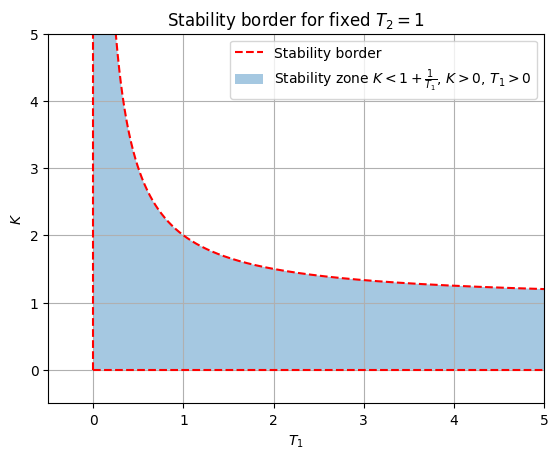

In [51]:
plt.plot(t_1, k,"r--",label=r"Stability border")
plt.plot(t_1, np.zeros_like(t_1),"r--")
plt.plot([0, 0], [0, 6],"r--")

plt.fill_between(t_1, k,alpha=0.4,label =r"Stability zone $K < 1 + \frac{1}{T_1}$, $K > 0$, $T_1 > 0$")

plt.xlim(-0.50,5)
plt.ylim(-0.5,5)
plt.xlabel("$T_1$")
plt.ylabel("$K$")
plt.grid()
plt.title(f"Stability border for fixed $T_2={T_2_s}$")
plt.legend()
plt.show()

Fixed T_1 

In [40]:
tf_2 = tf.subs(T_1, T_1_s)
tf_2

K/(K + s*(1 - s)*(T_2*s + 1))

In [42]:
sympy.Poly(-((sympy.fraction(tf_2)[1]).expand()/T_2).expand(),s).coeffs()

[1, (1 - T_2)/T_2, -1/T_2, -K/T_2]

No solution found for fixed T_1 = -1

Lets choose 3 points (stable, border stable, unstable)

In [54]:
K_val = [1, 2, 3]
T_1_val = [1, 1, 2]
T_2_val = [1, 1, 1]

In [55]:
transferFunction_2_1 = ctrl.tf([K_val[0]], [T_1_val[0]*T_2_val[0], T_2_val[0]+T_1_val[0], 1, K_val[0]])
transferFunction_2_2 = ctrl.tf([K_val[1]], [T_1_val[1]*T_2_val[1], T_2_val[1]+T_1_val[1], 1, K_val[1]])
transferFunction_2_3 = ctrl.tf([K_val[2]], [T_1_val[2]*T_2_val[2], T_2_val[2]+T_1_val[2], 1, K_val[2]])

In [65]:
modeling_time_2 = 20 # sec
time_2 = np.linspace(0,modeling_time_2,int(modeling_time_2/dt))
u_2 = np.ones_like(time_2)

In [66]:
init_state_2 = 0
y_2_1 = []
y_2_1.append(ctrl.forced_response(transferFunction_2_1, U=u_2, X0=init_state_2, T=time_2))
y_2_1.append(ctrl.forced_response(transferFunction_2_2, U=u_2, X0=init_state_2, T=time_2))
y_2_1.append(ctrl.forced_response(transferFunction_2_3, U=u_2, X0=init_state_2, T=time_2))

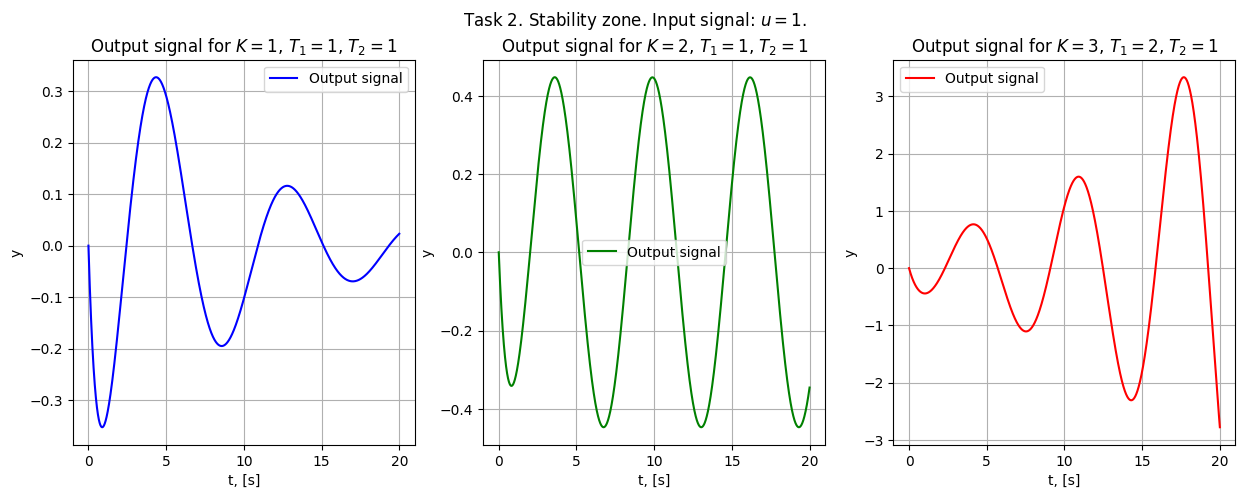

In [71]:
# Plotting
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle(f"Task 2. Stability zone. Input signal: $u=1$.")
for i in range(len(y_2_1)):
    ax[i].plot(time_2, y_2_1[i].states[0,:], color[i],label=f"Output signal")
    ax[i].set_ylabel("y")
    ax[i].set_xlabel("t, [s]")
    ax[i].grid(True)
    ax[i].set_title(f"Output signal for $K={K_val[i]}$, $T_1={T_1_val[i]}$, $T_2={T_2_val[i]}$")
    ax[i].legend()

## Task 3 (autonomous generator)

## Task 4 (canonical reachable form)

In [72]:
transferFunction_4 = transferFunction_1_3
state_space_4 = state_space_1_3

In [73]:
transferFunction_4

TransferFunction(array([1.]), array([ 1.  , -0.8 ,  4.16]))

In [74]:
state_space_4

StateSpace(array([[ 0.8 , -4.16],
       [ 1.  ,  0.  ]]), array([[1.],
       [0.]]), array([[-0.,  1.]]), array([[0.]]))

In [75]:
modeling_time_4 = 10 # sec
time_4 = np.linspace(0,modeling_time_4,int(modeling_time_4/dt))
u_4 = np.ones_like(time_4)*0 # free movement

/home/vladislav/.pyenv/versions/3.10.11/envs/control/lib/python3.10/site-packages/control/timeresp.py:946: UserWarning: Non-zero initial condition given for transfer function system. Internal conversion to state space used; may not be consistent with given X0.
  warnings.warn(


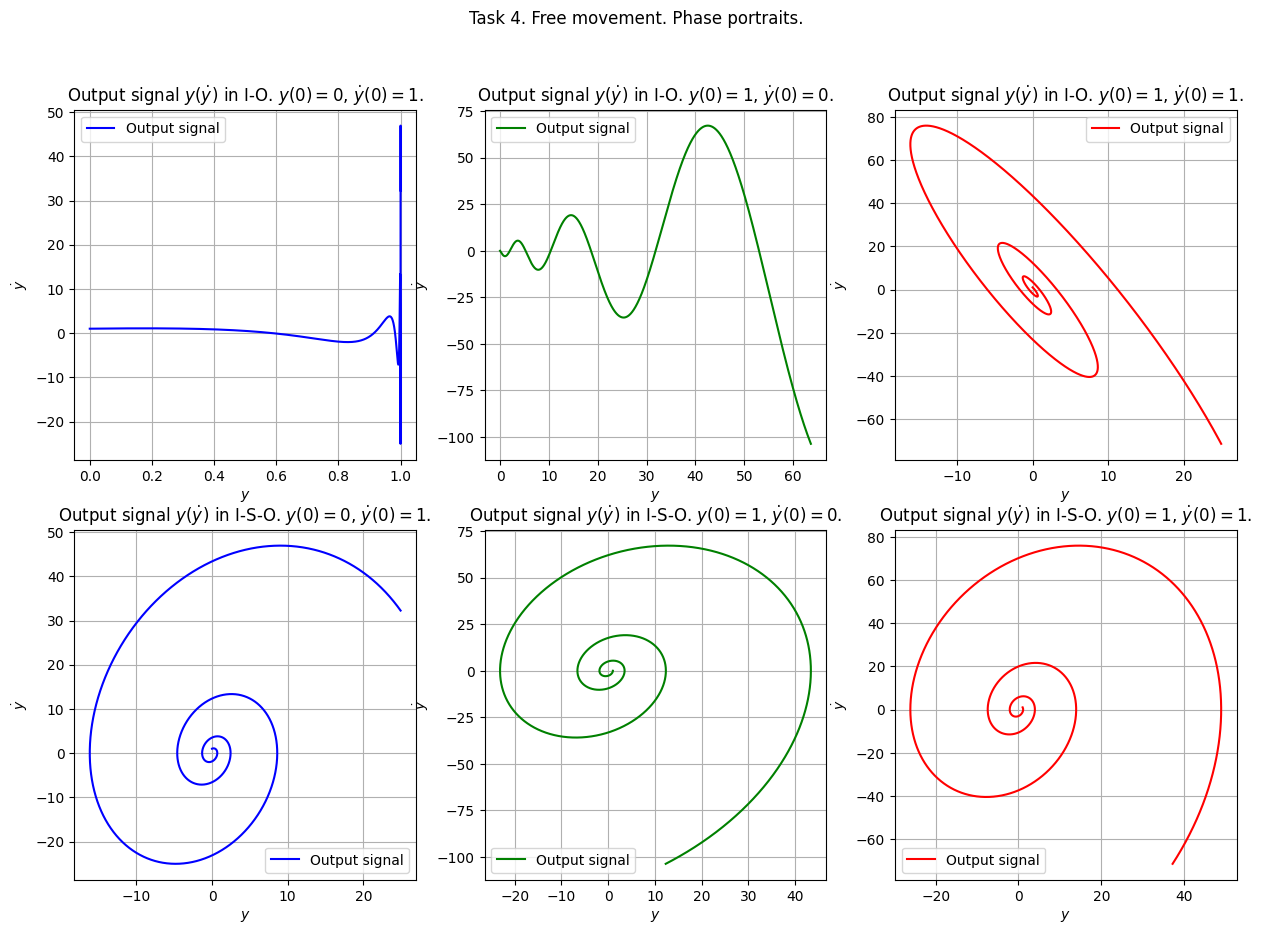

In [77]:
init_states_4 = [
    [1, 0],
    [0, 1],
    [1, 1]
]
y_4_1 = []
y_4_1.append(ctrl.forced_response(transferFunction_4, U=u_4, X0=init_states_4[0], T=time_4))
y_4_1.append(ctrl.forced_response(transferFunction_4, U=u_4, X0=init_states_4[1], T=time_4))
y_4_1.append(ctrl.forced_response(transferFunction_4, U=u_4, X0=init_states_4[2], T=time_4))

y_4_2 = []
y_4_2.append(ctrl.forced_response(state_space_4, U=u_4, X0=init_states_4[0], T=time_4))
y_4_2.append(ctrl.forced_response(state_space_4, U=u_4, X0=init_states_4[1], T=time_4))
y_4_2.append(ctrl.forced_response(state_space_4, U=u_4, X0=init_states_4[2], T=time_4))

# Plotting
fig, ax = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle(f"Task 4. Free movement. Phase portraits.")
for i in range(len(init_states_4)):
    ax[0,i].plot(y_1_1[i].outputs, y_4_1[i].states[0,:], color[i],label=f"Output signal")
    ax[0,i].set_ylabel("$\dot y$")
    ax[0,i].set_xlabel("$y$")
    ax[0,i].grid(True)
    ax[0,i].set_title(f"Output signal $y(\dot y)$ in I-O. $y(0)={init_states_4[i][1]}$, $\dot y(0)={init_states_4[i][0]}$.")
    ax[0,i].legend()

    ax[1,i].plot(y_4_2[i].states[1,:], y_4_2[i].states[0,:], color[i],label=f"Output signal")
    ax[1,i].set_ylabel("$\dot y$")
    ax[1,i].set_xlabel("$y$")
    ax[1,i].grid(True)
    ax[1,i].set_title(f"Output signal $y(\dot y)$ in I-S-O. $y(0)={init_states_4[i][1]}$, $\dot y(0)={init_states_4[i][0]}$.")
    ax[1,i].legend()